<a href="https://colab.research.google.com/github/Mutoy-choi/Dacon-ChatGPT-AI-/blob/main/LeNet_5(1998).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#import libraries
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [14]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [15]:
# define LeNet-5
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

class LeNet5_ReLU(nn.Module):
    def __init__(self):
        super(LeNet5_ReLU, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

Epoch [1/10], Loss: 0.2905, F1-score: 0.9158
Epoch [2/10], Loss: 0.0925, F1-score: 0.9715
Epoch [3/10], Loss: 0.0620, F1-score: 0.9810
Epoch [4/10], Loss: 0.0478, F1-score: 0.9851
Epoch [5/10], Loss: 0.0377, F1-score: 0.9884
Epoch [6/10], Loss: 0.0311, F1-score: 0.9904
Epoch [7/10], Loss: 0.0255, F1-score: 0.9919
Epoch [8/10], Loss: 0.0213, F1-score: 0.9932
Epoch [9/10], Loss: 0.0176, F1-score: 0.9947
Epoch [10/10], Loss: 0.0162, F1-score: 0.9948
Epoch [1/10], Loss: 0.3470, F1-score: 0.8928
Epoch [2/10], Loss: 0.0989, F1-score: 0.9695
Epoch [3/10], Loss: 0.0683, F1-score: 0.9791
Epoch [4/10], Loss: 0.0540, F1-score: 0.9838
Epoch [5/10], Loss: 0.0444, F1-score: 0.9865
Epoch [6/10], Loss: 0.0374, F1-score: 0.9881
Epoch [7/10], Loss: 0.0332, F1-score: 0.9898
Epoch [8/10], Loss: 0.0271, F1-score: 0.9914
Epoch [9/10], Loss: 0.0227, F1-score: 0.9926
Epoch [10/10], Loss: 0.0226, F1-score: 0.9929


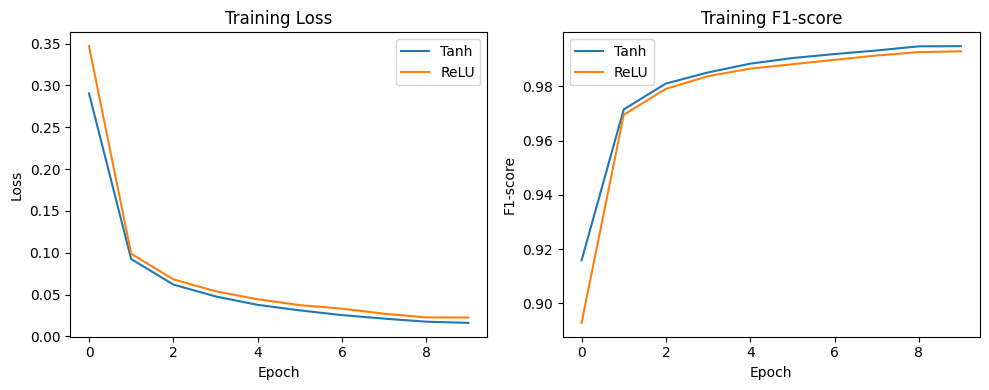

In [16]:
# Hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load data
train_dataset = datasets.MNIST(root="data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root="data", train=False, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Initialize network
model = LeNet5().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Initialize lists to store losses and accuracies
train_losses = []
train_accuracies = []

# Train Network function
def train_network(model, train_loader, device, num_epochs, learning_rate):
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    train_f1_scores = []

    for epoch in range(num_epochs):
        epoch_losses = []
        epoch_targets = []
        epoch_predictions = []

        for batch_idx, (data, targets) in enumerate(train_loader):
            # Get data to cuda if possible
            data = data.to(device=device)
            targets = targets.to(device=device)

            # forward
            scores = model(data)
            loss = criterion(scores, targets)
            epoch_losses.append(loss.item())

            # backward
            optimizer.zero_grad()
            loss.backward()

            # gradient descent or Adam step
            optimizer.step()

            _, predictions = scores.max(1)
            epoch_targets.extend(targets.cpu().numpy())
            epoch_predictions.extend(predictions.cpu().numpy())

        avg_loss = sum(epoch_losses) / len(epoch_losses)
        train_losses.append(avg_loss)
        epoch_f1_score = f1_score(epoch_targets, epoch_predictions, average='weighted')
        train_f1_scores.append(epoch_f1_score)

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, F1-score: {epoch_f1_score:.4f}")

    return train_losses, train_f1_scores

# Initialize networks
model_tanh = LeNet5().to(device)
model_relu = LeNet5_ReLU().to(device)

# Train both models
train_losses_tanh, train_f1_scores_tanh = train_network(model_tanh, train_loader, device, num_epochs, learning_rate)
train_losses_relu, train_f1_scores_relu = train_network(model_relu, train_loader, device, num_epochs, learning_rate)

# Plot training loss and F1-score for both models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(train_losses_tanh, label='Tanh')
ax1.plot(train_losses_relu, label='ReLU')
ax1.legend()

ax2.set_title('Training F1-score')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('F1-score')
ax2.plot(train_f1_scores_tanh, label='Tanh')
ax2.plot(train_f1_scores_relu, label='ReLU')
ax2.legend()

fig.tight_layout()
plt.show()